Alexa Roskowski

CIS 471

02/16/2022


---

# Homework 1






First import the dataset and the training set, so we can use them for our models. 

In [ ]:

from torchvision.transforms.transforms import ToPILImage
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T 
import torch
import numpy as np
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt



transform = T.Compose( [
    T.ToTensor(),
    T.Normalize(
        (1., 1., 1.),
        (1., 1., 1.)) ]
    )

#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html



cifar_dataset = datasets.CIFAR10(root = './',
                         train = True,
                         download=True,
                         transform = transform
                         )

train_data = DataLoader(cifar_dataset, batch_size = 1, ) #shuffle = True

test_set  = datasets.CIFAR10(root='./',
                           train = False,
                           download = True,
                           transform = transform, )

test_data = DataLoader(test_set, batch_size = 1, shuffle = True,)


print(type(train_data))

#print(type(iter()))
#data_iter = iter(train_data) #WHY BROKEN :(
#print(type(data))

#single_point = next(data)
#print(len(train_data))
#single_point is a list of batchsize tensors

#single_test = next(iter(test_data))

labels = ["plane", "car", "bird", "cat", "deer", "dog", 
           "frog", "horse", "ship", "truck"]








  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
<class 'torch.utils.data.dataloader.DataLoader'>


# Linear Classification:



The fist block of code here is a linear classification through linear regression. It does use *not* bias along with the individual weights. Images are hard to classify linearly, and as such it will never be particularly accurate.

In [ ]:
from torch.autograd import Variable


class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim = 3*(32*32), output_dim = 10, bias =False):
      super(LinearClassifier, self).__init__()
      self.net = torch.nn.Sequential(
          torch.nn.Linear(input_dim, output_dim),
          torch.nn.ReLU(inplace = True))


    def forward(self, x):
      x = torch.flatten(x, 1)
      outputs = self.net(x)
      return outputs


  


device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = LinearClassifier()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)




losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
print(len(train_data))
for epoch in range(10):
  t_correct = 0
  t_total = 0
  for d in train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)

    loss.backward()

    optimizer.step()
    iter+=1

    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()


    if iter % 50000 == 0: 
      losses.append(loss.item())


      correct = 0
      total = 0
      for images, labels in test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        #print(labels.size())
        #print(total)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")


#https://www.youtube.com/watch?v=TXLLjE3ae58&ab_channel=datahacker.rs
#https://towardsdatascience.com/logistic-regression-on-mnist-with-pytorch-b048327f8d19

50000
Iteration: 50000 Loss: 2.4783191680908203 Accuracy: 20.029998779296875
Iteration: 100000 Loss: 2.4544308185577393 Accuracy: 20.079999923706055
Iteration: 150000 Loss: 2.4288010597229004 Accuracy: 20.170000076293945
Iteration: 200000 Loss: 2.3933582305908203 Accuracy: 20.229999542236328
Iteration: 250000 Loss: 2.3865456581115723 Accuracy: 26.51999855041504
Iteration: 300000 Loss: 2.359738349914551 Accuracy: 27.03999900817871
Iteration: 350000 Loss: 2.3356213569641113 Accuracy: 25.489999771118164
Iteration: 400000 Loss: 2.3231022357940674 Accuracy: 25.67999839782715
Iteration: 450000 Loss: 2.3124518394470215 Accuracy: 25.760000228881836
Iteration: 500000 Loss: 2.3025851249694824 Accuracy: 25.59000015258789
done


The code, as expected, only got to a 25% accuuracy. Below we can see the test and the training accuracy plotted together. Additionally, it took 15 minutes to complete.

tensor(25.5900, device='cuda:0')
tensor(26.8720, device='cuda:0')
10
10


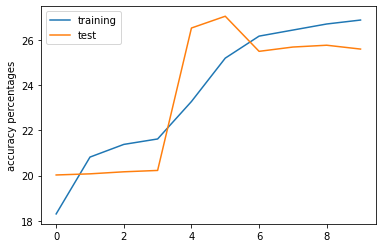

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))


Here is the loss of the linear regression model calculated through cross entropy:

<class 'float'>
<class 'list'>


Text(0, 0.5, 'loss')

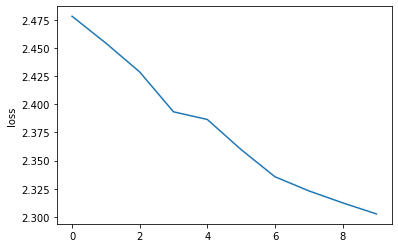

In [ ]:
print(type(losses[1]))
print(type(losses))
plt.plot(losses)

plt.ylabel("loss")

Here is the same linear regression classifier, but 
this time with multipe layers, and bias as well. Since there are more layers we expect the accuracy to increase. Let's see if that actually happens.

In [ ]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim = 3*(32*32), hidden_dim = 1024, output_dim = 10):
      super(LinearClassifier, self).__init__()
      self.net = torch.nn.Sequential(
          torch.nn.Linear(input_dim, hidden_dim),
          torch.nn.ReLU(inplace = True),
          torch.nn.Linear(hidden_dim, hidden_dim),
          torch.nn.ReLU(inplace = True),
          torch.nn.Linear(hidden_dim, output_dim),
          torch.nn.ReLU(inplace = True))
      
    def forward(self, x):
      x = torch.flatten(x,1)
      outputs = self.net(x)
      return outputs


device = 'cuda' if torch.cuda.is_available() else 'cpu'





model = LinearClassifier()
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)





losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
print(len(train_data))
for epoch in range(7):
  t_correct = 0
  t_total = 0
  for d in train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)

    loss.backward()

    optimizer.step()
    iter+=1

    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()
    

    if iter % 50000 == 0: 
      losses.append(loss.item())

      correct = 0
      total = 0
      for images, labels in test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        #print(labels.size())
        #print(total)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")


50000
Iteration: 50000 Loss: 2.749105215072632 Accuracy: 32.45000076293945
Iteration: 100000 Loss: 2.6507480144500732 Accuracy: 41.30999755859375
Iteration: 150000 Loss: 2.579488754272461 Accuracy: 43.84000015258789
Iteration: 200000 Loss: 2.5475056171417236 Accuracy: 45.279998779296875
Iteration: 250000 Loss: 2.5377724170684814 Accuracy: 46.87999725341797
Iteration: 300000 Loss: 2.391055107116699 Accuracy: 47.80999755859375
Iteration: 350000 Loss: 2.606766939163208 Accuracy: 48.78999710083008
done


Since there are more layers it did get a better accuracy, this time it was 49% right on the test data. However it did take much longer, this took 17 minutes, but I only did 7 epochs instead of 10 for the single layer model.

tensor(48.7900, device='cuda:0')
tensor(50.1100, device='cuda:0')
7
7


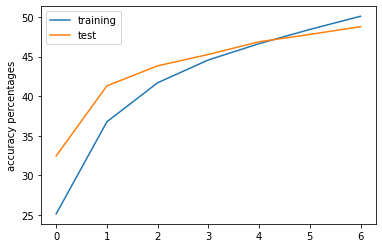

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))

The accuracy of this linear model is MUCH better that the linear model with only one layer. 

Text(0, 0.5, 'loss')

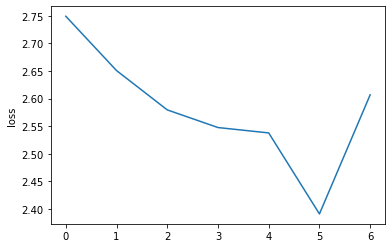

In [ ]:
plt.plot(losses)

plt.ylabel("loss")

The loss got realy weird after 7 epochs which is why is why I stopped where I did. Now lets look at what happens with multiple layers and Softmax - or GELU instead of ReLU. This is the exact same as the one we just did previously, so we will be able to directly compare the differences. 

In [ ]:
import torchvision.models as models



class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim = 3*(32*32), hidden_dim = 1024, output_dim = 10):
      super(LinearClassifier, self).__init__()
      self.net = torch.nn.Sequential(
          torch.nn.Linear(input_dim, hidden_dim),
          torch.nn.GELU(),
          torch.nn.Linear(hidden_dim, hidden_dim),
          torch.nn.GELU(),
          torch.nn.Linear(hidden_dim, output_dim),
          torch.nn.GELU())

    def forward(self, x):
      x = torch.flatten(x,1)
      outputs = self.net(x)
      return outputs


device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = LinearClassifier()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)





losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
print(len(train_data))
for epoch in range(7):
  t_correct = 0
  t_total = 0
  for d in train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)

    loss.backward()

    optimizer.step()
    iter+=1

    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()

    if iter % 50000 == 0: 
      losses.append(loss.item())

      correct = 0
      total = 0
      for images, labels in test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        #print(labels.size())
        #print(total)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")


50000
Iteration: 50000 Loss: 2.81643009185791 Accuracy: 37.87999725341797
Iteration: 100000 Loss: 2.934156894683838 Accuracy: 41.959999084472656
Iteration: 150000 Loss: 2.876586437225342 Accuracy: 44.34000015258789
Iteration: 200000 Loss: 2.9105682373046875 Accuracy: 46.0099983215332
Iteration: 250000 Loss: 3.149080276489258 Accuracy: 46.849998474121094
Iteration: 300000 Loss: 3.516268730163574 Accuracy: 47.80999755859375
Iteration: 350000 Loss: 3.912964344024658 Accuracy: 48.36000061035156
done


The softmax model also took 17 minutes and did a tiny bit worse than the previous model. This time we got an accuracy of 48%. Here is the accuracy for the softmax model:


  

tensor(48.3600, device='cuda:0')
tensor(49.4980, device='cuda:0')
7
7


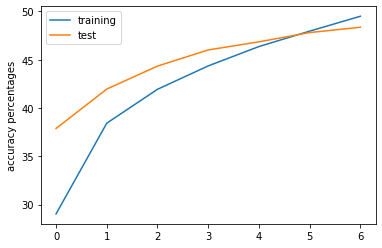

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))

The accuracy graph looks pretty much the exact same as the last graph.

Text(0, 0.5, 'loss')

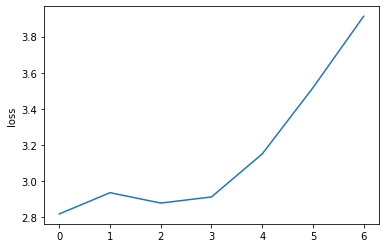

In [ ]:
plt.plot(losses)

plt.ylabel("loss")

The loss started increasing much earlier than the other models did. So using GELU instead of RELU is not a good plan in this specific scenario. 






# Convolutional Classifiers:


Lets start with loading in the dataset and transforming them in a useful way for the CNNs that we will be using in this section.




In [ ]:
import torchvision.models as models

transform = T.Compose( [
    T.ToTensor(),
    #T.CenterCrop(10),
    #T.ColorJitter(brightness = .5),
    T.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010)) ]
    )
  


c_cifar_dataset = datasets.CIFAR10(root = './',
                         train = True,
                         download=True,
                         transform = transform
                         )

c_train_data = DataLoader(c_cifar_dataset, batch_size = 100, ) #shuffle = True

c_test_set  = datasets.CIFAR10(root='./',
                           train = False,
                           download = True,
                           transform = transform, )

c_test_data = DataLoader(c_test_set, batch_size = 100, shuffle = True,)

Files already downloaded and verified
Files already downloaded and verified


With the basics out of the way we will now build our own Convolutional Nueral Network and train it. For this I am basing it on LeNet, however LeNet was originally made for black and white images, so I needed to modify it a bit to make it work for the 3 channels (red, green and blue) that CIFAR10 utilizes.

In [ ]:

class Net(torch.nn.Module):
    def __init__(self, ninputs=3*32*32, nhidden=1024, nout=10,):
        super(Net, self).__init__()
        self.cnn = torch.nn.Sequential(
            torch.nn.Conv2d(3, 6, 5, stride = 1, padding=0),
            torch.nn.ReLU(inplace = True),
            torch.nn.AvgPool2d(2, stride = 2),
            torch.nn.Conv2d(6, 16, 5, stride = 1, padding=0),
            torch.nn.ReLU(inplace = True),
            torch.nn.AvgPool2d(2, stride = 2),
            torch.nn.Conv2d(16, 120, 5, stride = 1, padding=0),

            torch.nn.ReLU(inplace = True),

        )
        self.lin = torch.nn.Sequential(
            torch.nn.Linear(120, 84),
            torch.nn.ReLU(inplace = True),
            torch.nn.Linear(84, 10),
            
        )

        
    def forward(self, x):
        #x = torch.flatten(x,1)
        x = self.cnn(x)
        x = torch.flatten(x,1)
        x = self.lin(x)  
      
        return x


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)






losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
for epoch in range(100):
  t_correct = 0
  t_total = 0
  for d in c_train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)

    loss.backward()

    optimizer.step()
    iter+=1
    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()

    
  
   
    if iter % 500 == 0: 
      losses.append(loss.item())

      correct = 0
      total = 0
      for images, labels in c_test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")

#https://medium.datadriveninvestor.com/architecture-implementation-of-lenet-from-scratch-in-pytorch-709cc38c00a9

Iteration: 500 Loss: 2.3084185123443604 Accuracy: 10.029999732971191
Iteration: 1000 Loss: 2.306023597717285 Accuracy: 11.09000015258789
Iteration: 1500 Loss: 2.3033437728881836 Accuracy: 12.299999237060547
Iteration: 2000 Loss: 2.3001248836517334 Accuracy: 13.170000076293945
Iteration: 2500 Loss: 2.295949697494507 Accuracy: 13.839999198913574
Iteration: 3000 Loss: 2.2900753021240234 Accuracy: 14.579999923706055
Iteration: 3500 Loss: 2.280712604522705 Accuracy: 15.859999656677246
Iteration: 4000 Loss: 2.2651381492614746 Accuracy: 18.689998626708984
Iteration: 4500 Loss: 2.239427089691162 Accuracy: 20.579999923706055
Iteration: 5000 Loss: 2.203592300415039 Accuracy: 21.85999870300293
Iteration: 5500 Loss: 2.1663506031036377 Accuracy: 22.849998474121094
Iteration: 6000 Loss: 2.1369948387145996 Accuracy: 24.059999465942383
Iteration: 6500 Loss: 2.1194891929626465 Accuracy: 24.979999542236328
Iteration: 7000 Loss: 2.1086268424987793 Accuracy: 25.920000076293945
Iteration: 7500 Loss: 2.0988

We expect a CNN to do better than a linear classification model, as it is extremmly hard to differencitate an image solely linearly. This model took 45 minutes and got an end accuracy of 52%. Let's look at the accuracy of our nueral network graphed out:

tensor(51.6300, device='cuda:0')
tensor(52.5640, device='cuda:0')
100
100


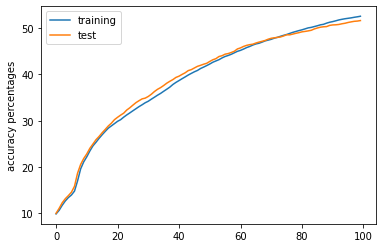

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))

That looks much better than the majority of the the other sets in all honesty. Now lets look at the loss.

Text(0, 0.5, 'loss')

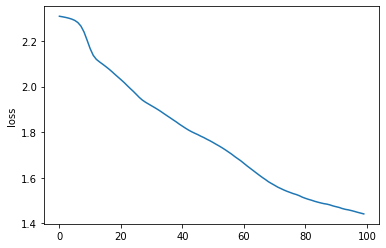

In [ ]:
plt.plot(losses)

plt.ylabel("loss")

From how the loss and acurracy look I think the training could go for more epochs. Now, let's use a built in model from pytorch this time to compare and contrast the accuracy and loss. We are going to use the ResNet18 model, that is untrained. 

In [ ]:
import torchvision.models as models

renet18_model = models.resnet18(pretrained = False)

model = renet18_model
print(model)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)






losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
for epoch in range(15):
  t_correct = 0
  t_total = 0
  for d in c_train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)

    loss.backward()

    optimizer.step()
    iter+=1

    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()


  
   
    if iter % 500 == 0: 
      losses.append(loss.item())

      correct = 0
      total = 0
      for images, labels in c_test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

This ResNet 18 model took 7 minutes to train and got an accuracy of 50%. This model didn't need as many epochs to get that accuracy, it only had 15 epochs Now that we have tested and trained the model, let's look at the accuracy:

tensor(50.1600, device='cuda:0')
tensor(85.4100, device='cuda:0')
15
15


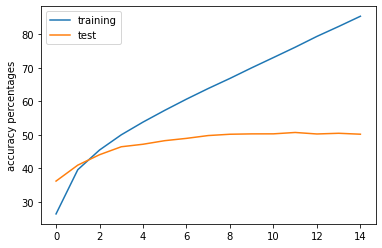

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))

This accuracy is much higher that what we got in the linear models and it looks pretty good. Let's look at the loss.

Text(0, 0.5, 'loss')

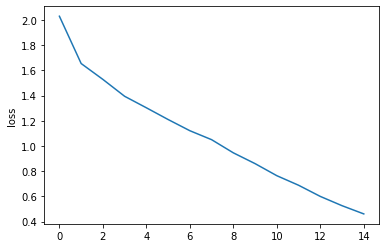

In [ ]:
plt.plot(losses)

plt.ylabel("loss")


The loss looks as expected. Now we are going to use the ResNet18 built in pytoch model once again, but this time we are using a different optimizer. Instead of SGD, which we have been using, we are going to use Adam.


In [ ]:
renet18_model = models.resnet18(pretrained = False)
model = renet18_model

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
for epoch in range(10):
  t_correct = 0
  t_total = 0
  for d in c_train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)


    loss.backward()

    optimizer.step()
    iter+=1

    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()
    losses.append(loss.item())    
 
    if iter % 500 == 0: 
      losses.append(loss.item())

      correct = 0
      total = 0
      for images, labels in c_test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  
  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")




cuda:0
Iteration: 500 Loss: 1.0586148500442505 Accuracy: 60.8599967956543
Iteration: 1000 Loss: 0.8434422016143799 Accuracy: 66.8699951171875
Iteration: 1500 Loss: 0.6737024784088135 Accuracy: 69.65999603271484
Iteration: 2000 Loss: 0.6043102145195007 Accuracy: 70.72999572753906
Iteration: 2500 Loss: 0.481655091047287 Accuracy: 70.75999450683594
Iteration: 3000 Loss: 0.3919850289821625 Accuracy: 71.43999481201172
Iteration: 3500 Loss: 0.4362817406654358 Accuracy: 71.72999572753906
Iteration: 4000 Loss: 0.3238430917263031 Accuracy: 71.68000030517578
Iteration: 4500 Loss: 0.2566445469856262 Accuracy: 72.30999755859375
Iteration: 5000 Loss: 0.17834235727787018 Accuracy: 71.87999725341797
done


The optimizer Adam creates an accuracy of 72% and this model took 6 minutes to complete. All in all the accuracy is much higher with the Adam optimizer instead of the SGD optimizer as you can see below.

tensor(71.8800, device='cuda:0')
tensor(94., device='cuda:0')
10
10


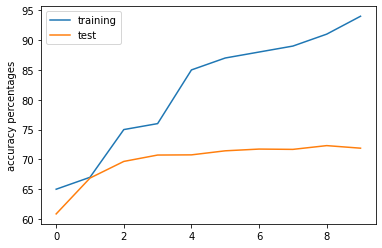

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))

Now we have the loss, which is also much lower than other models and optimizers have been.

Text(0, 0.5, 'loss')

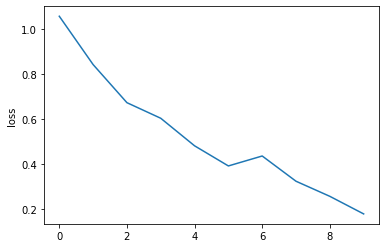

In [ ]:
plt.plot(losses)

plt.ylabel("loss")

Now we will use a different built in model in oreder to see the difference, I will be using AlexNet. In AlexNet, the images need to be resized to 256, so that is what is happening at the begining of this code.

In [ ]:
import torchvision.models as models

transform = T.Compose([
    T.Resize(256),
    T.ToTensor(),
    T.Normalize(
        [0.485, 0.456, 0.406], 
        [0.229, 0.224, 0.225]),
])

c_cifar_dataset = datasets.CIFAR10(root = './',
                         train = True,
                         download=True,
                         transform = transform
                         )

c_train_data = DataLoader(c_cifar_dataset, batch_size = 100, ) #shuffle = True

c_test_set  = datasets.CIFAR10(root='./',
                           train = False,
                           download = True,
                           transform = transform, )

c_test_data = DataLoader(c_test_set, batch_size = 100, shuffle = True,)




alex_net = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained = False)
model = alex_net
print(model)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


print(len(c_test_data))



losses = []
test_accuracy = []
train_t_accuracy = []
train = {}
iter = 0
for epoch in range(10):
  t_correct = 0
  t_total = 0
  for d in c_train_data:
    output = model(d[0].to(device))
    optimizer.zero_grad()
    label = d[1].to(device)
    loss = criterion(output, label)


    loss.backward()

    optimizer.step()
    iter+=1

    _, t_predicted = torch.max(output.data, 1)
    t_total += label.size(0)  
    t_correct += (t_predicted == label).sum()
    losses.append(loss.item())    
 
    if iter % 500 == 0: 
      losses.append(loss.item())

      correct = 0
      total = 0
      for images, labels in c_test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct/total
      test_accuracy.append(accuracy)
      print("Iteration:", iter, "Loss:", loss.item(), "Accuracy:", accuracy.item())

  
  train_accuracy = 100 * t_correct/t_total
  train_t_accuracy.append(train_accuracy)



    #optimizer.zero_grad()


print("done")




Files already downloaded and verified
Files already downloaded and verified


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

This model took 1 hour to train and it got an accuracy of 18%. Here is the accuracy of AlexNet with 10 epochs:




tensor(23.5300, device='cuda:0')
tensor(22.1000, device='cuda:0')
10
10


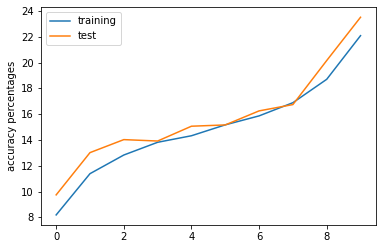

In [ ]:
t = []

#torch.Tensor.cpu(test_accuracy)
for i in test_accuracy:

  t += [torch.Tensor.cpu(i)]

tt = []
for i in train_t_accuracy:
  tt += [torch.Tensor.cpu(i)]

plt.plot(tt, label = "training")
plt.plot(t, label = "test")

plt.legend()
plt.ylabel("accuracy percentages")

print(test_accuracy[-1])
print(train_t_accuracy[-1])
print(len(train_t_accuracy))
print(len(test_accuracy))

It is not the most accurate of convolutional nueral networks that we have used thus far, and ResNet was better. However that makes sense since AlexNet is an extremmly deep nueral network that needs an extreme amount of data in order to train to any sort of accuracy. CIFAR10 is not enough data, and my computer cannot handle doing more epoch than I already did. Here is the loss of the nueral network:

Text(0, 0.5, 'loss')

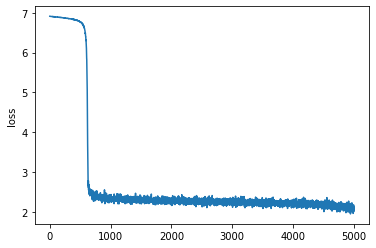

In [ ]:
#l = []
#for i in losses:
#  l += [torch.Tensor.cpu(i)]
plt.plot(losses)

plt.ylabel("loss")

The loss looks similiar to a lot of the others that we have seen so far.: